# 5-Fold Cross-Validation with Rotating Test, Validation, and Training Splits

In [2]:
# Install the required packages and import the functions
! pip install -q import-ipynb
! pip install -q scikit-learn
import import_ipynb
from create_pswm import * #function that get the pswm
from validation_and_testing_vonheijne import * #function that creates the validation scores
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display


[notice] A new release of pip is available: 25.0 -> 25.2
[notice] To update, run: C:\Users\utente\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.0 -> 25.2
[notice] To update, run: C:\Users\utente\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.0 -> 25.2
[notice] To update, run: C:\Users\utente\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.0 -> 25.2
[notice] To update, run: C:\Users\utente\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


----------------------------------------------------------------------------------------------------
testing set:  1
validation set:  2
training sets:  (3, 4, 5)


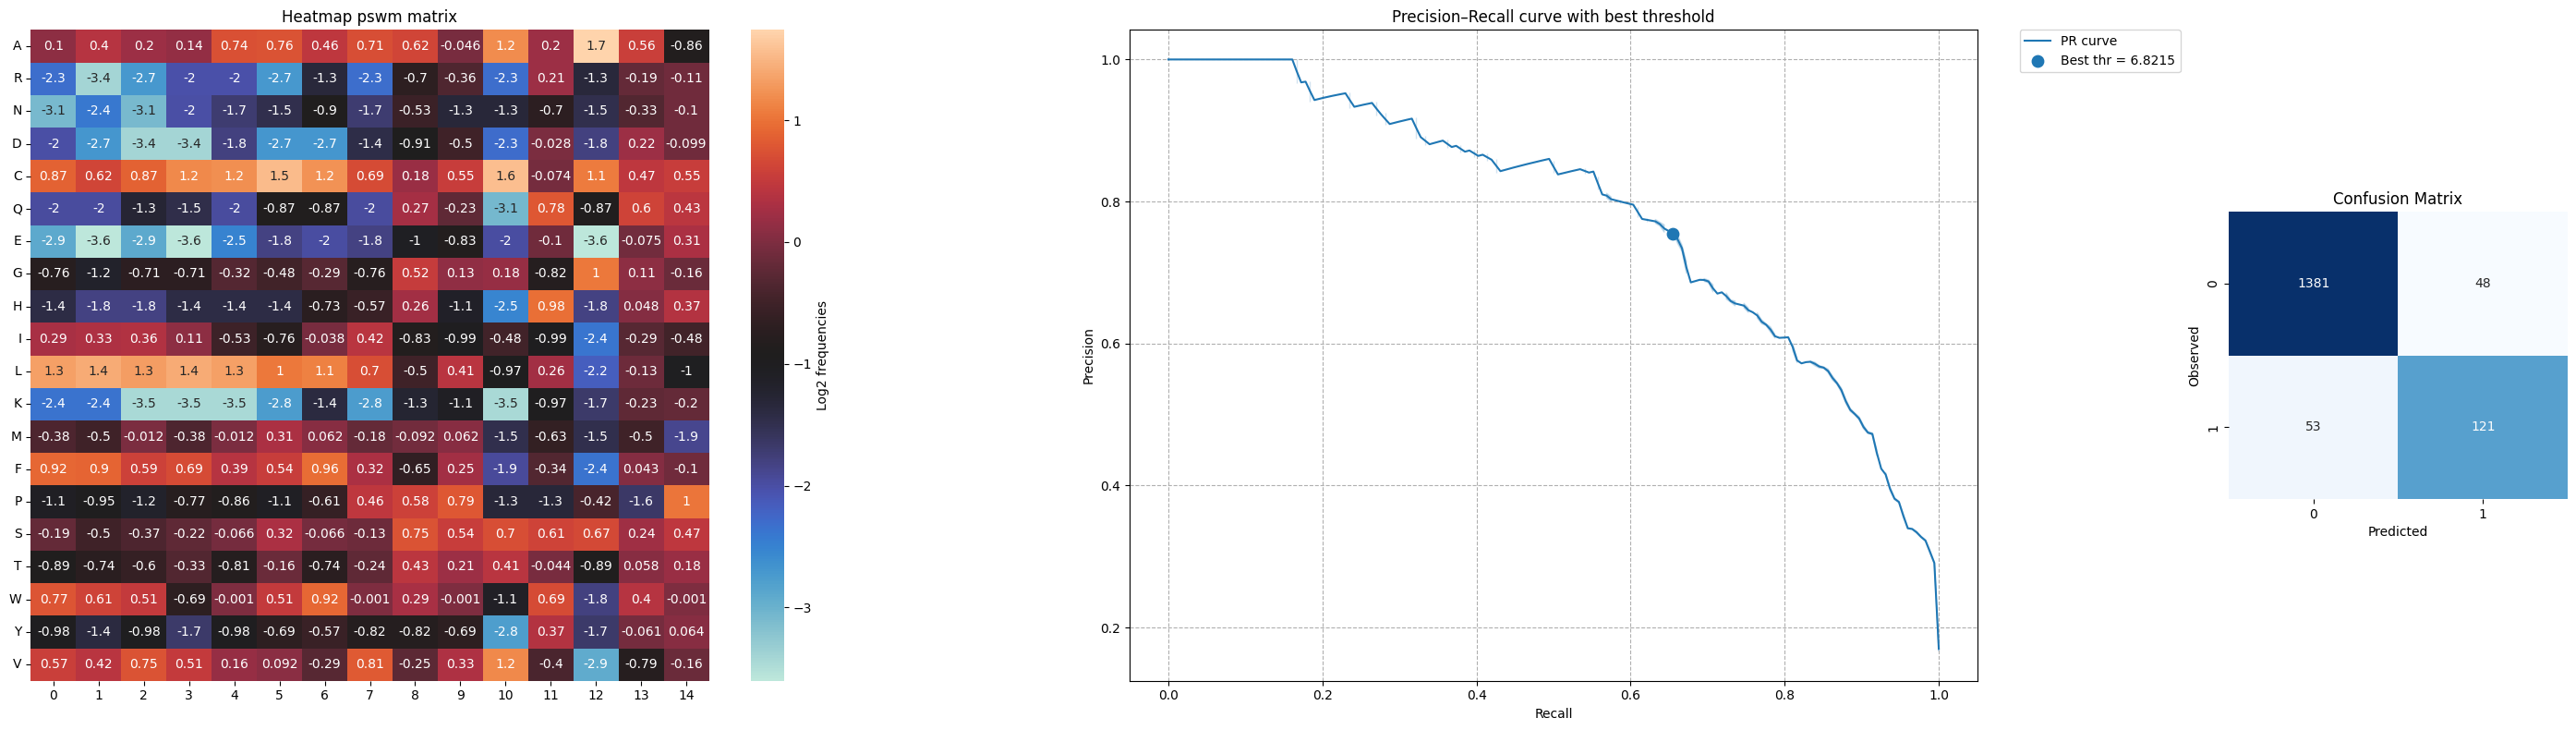

MCC = 0.6703593863392895
Precision = 0.9369931378665003
Accuracy = 0.7159763313609467
Sensitivity = 0.6954022988505747
Confusion Matrix : 
          Positive  Negative
Positive      1381        48
Negative        53       121
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
testing set:  2
validation set:  3
training sets:  (4, 5, 1)


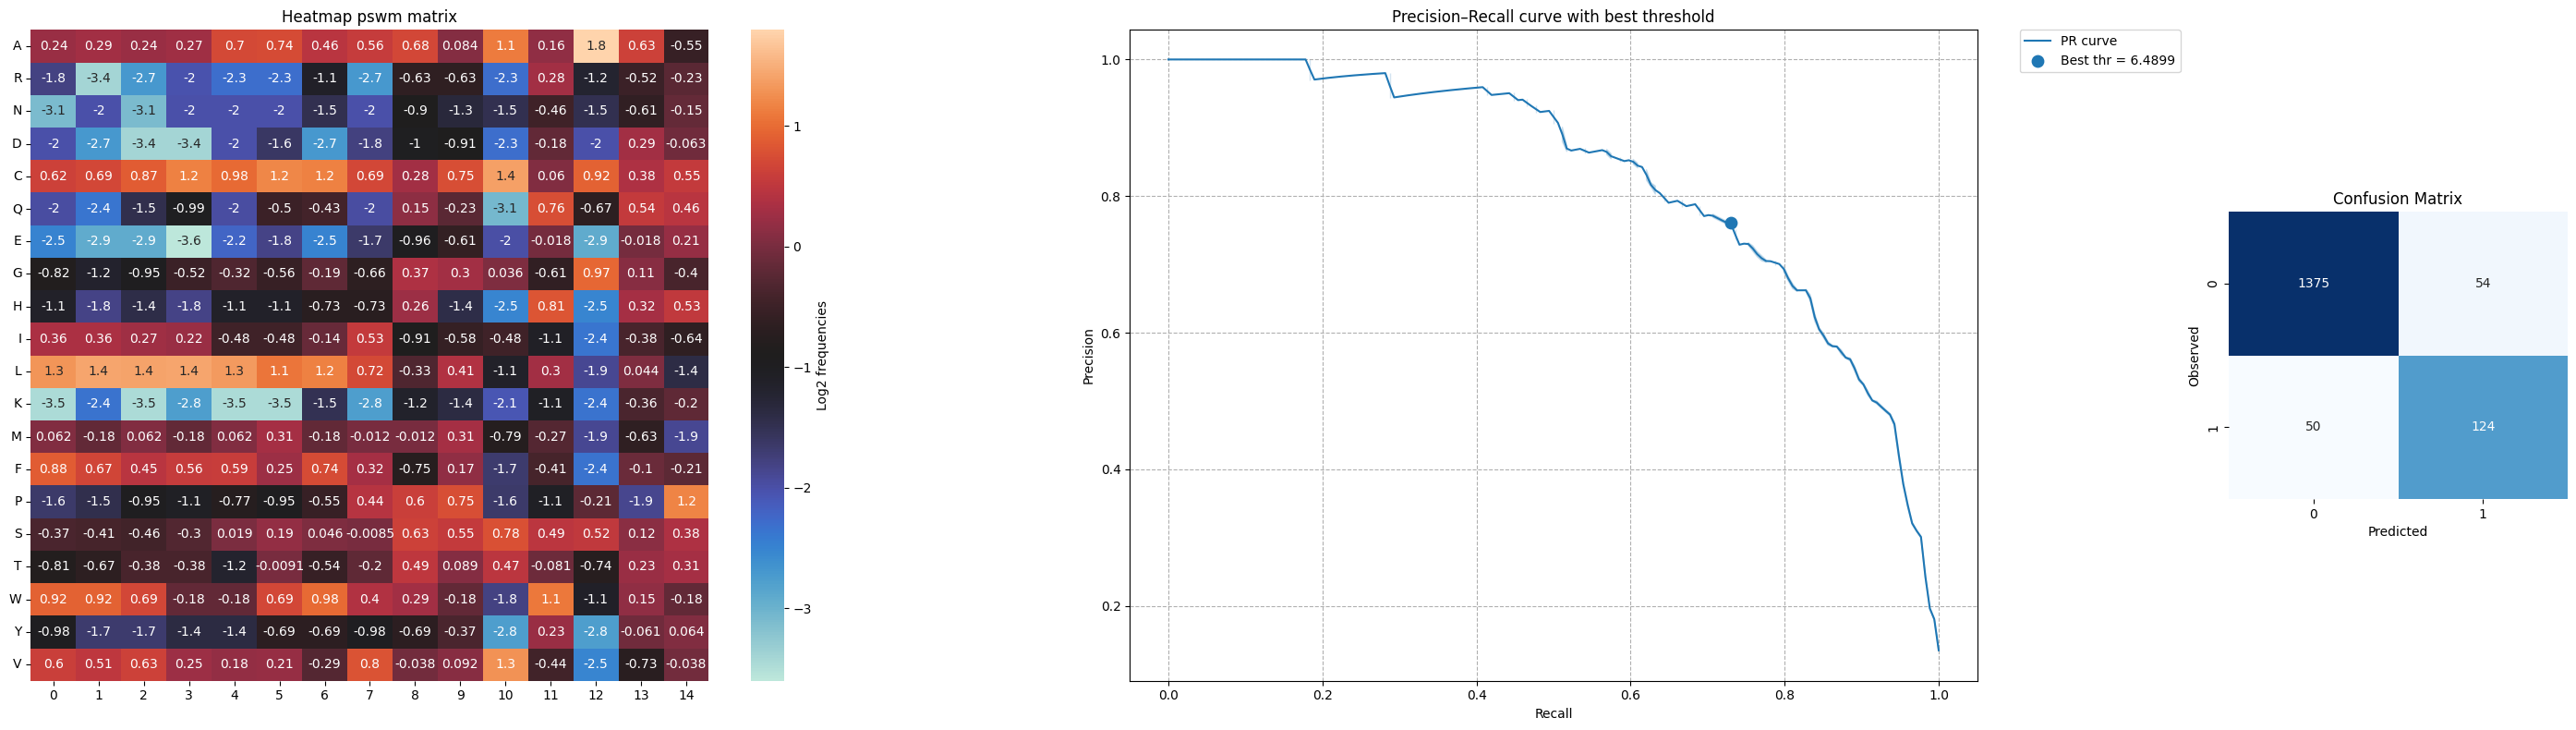

MCC = 0.6681650954834917
Precision = 0.9351216469120399
Accuracy = 0.6966292134831461
Sensitivity = 0.7126436781609196
Confusion Matrix : 
          Positive  Negative
Positive      1375        54
Negative        50       124
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
testing set:  3
validation set:  4
training sets:  (5, 1, 2)


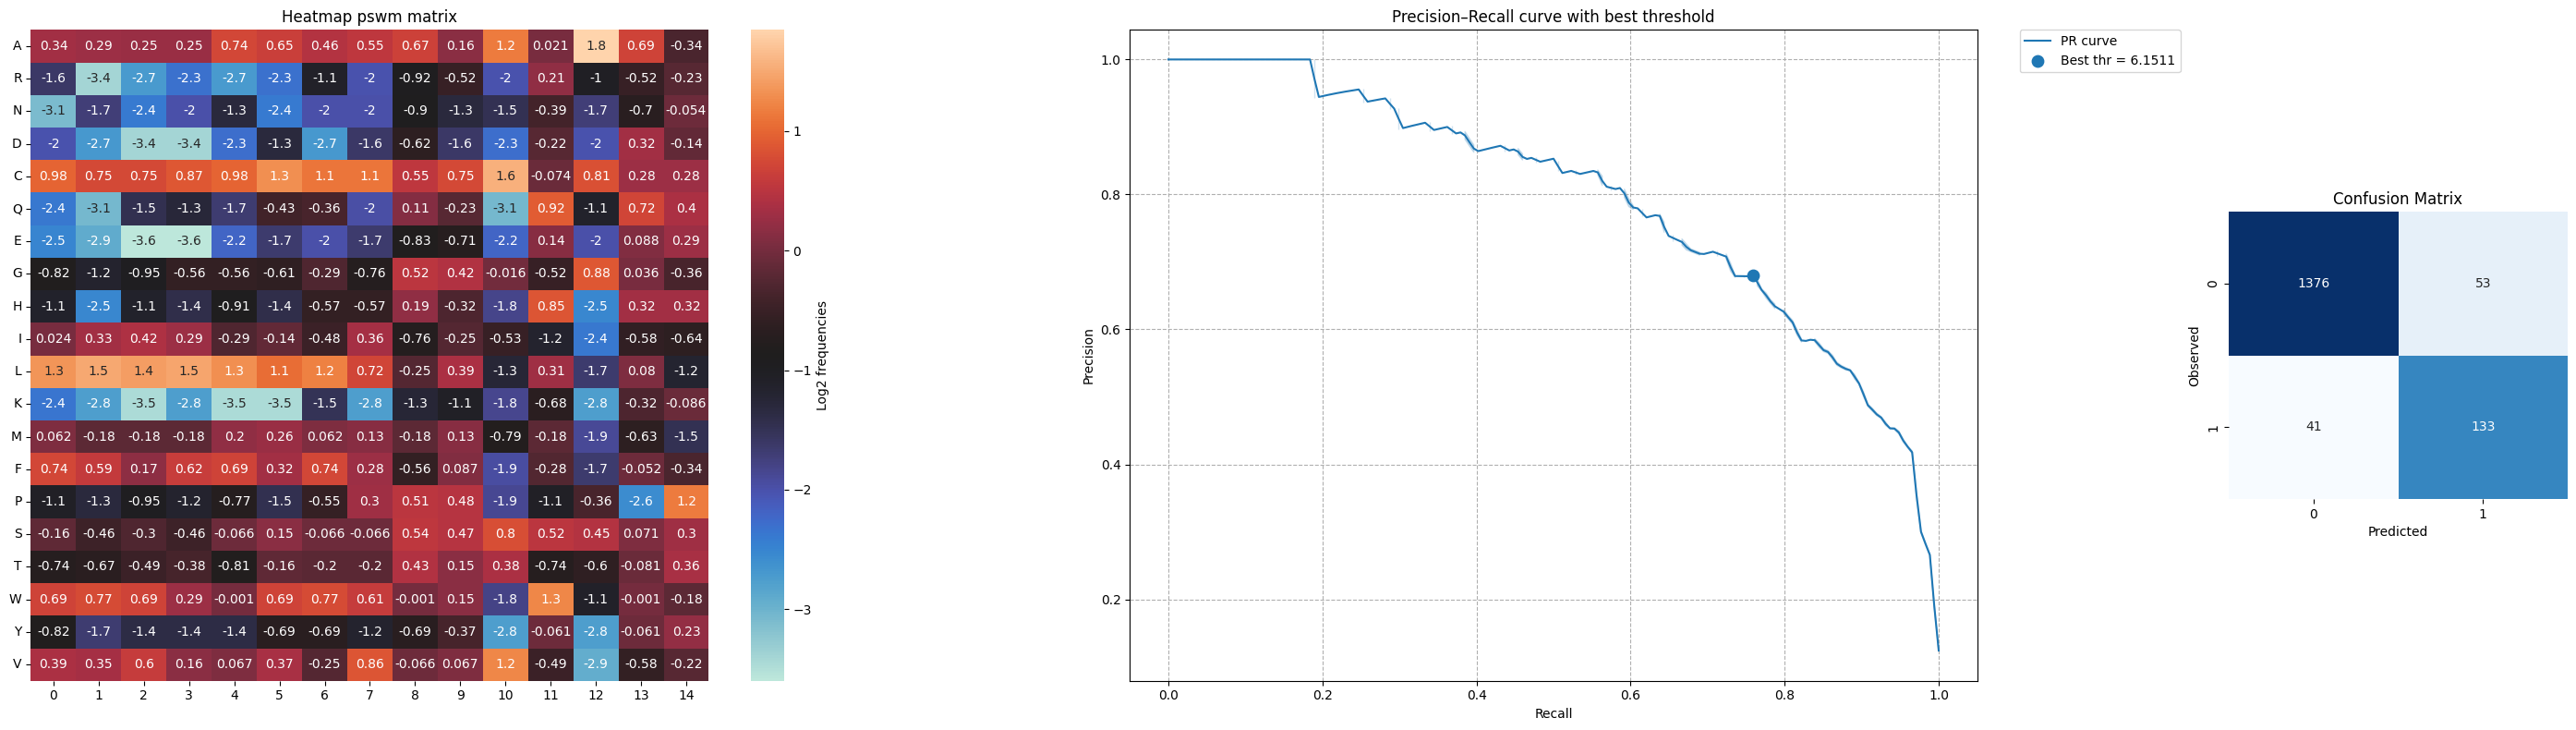

MCC = 0.7063994537370499
Precision = 0.9413599500935745
Accuracy = 0.7150537634408602
Sensitivity = 0.764367816091954
Confusion Matrix : 
          Positive  Negative
Positive      1376        53
Negative        41       133
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
testing set:  4
validation set:  5
training sets:  (1, 2, 3)


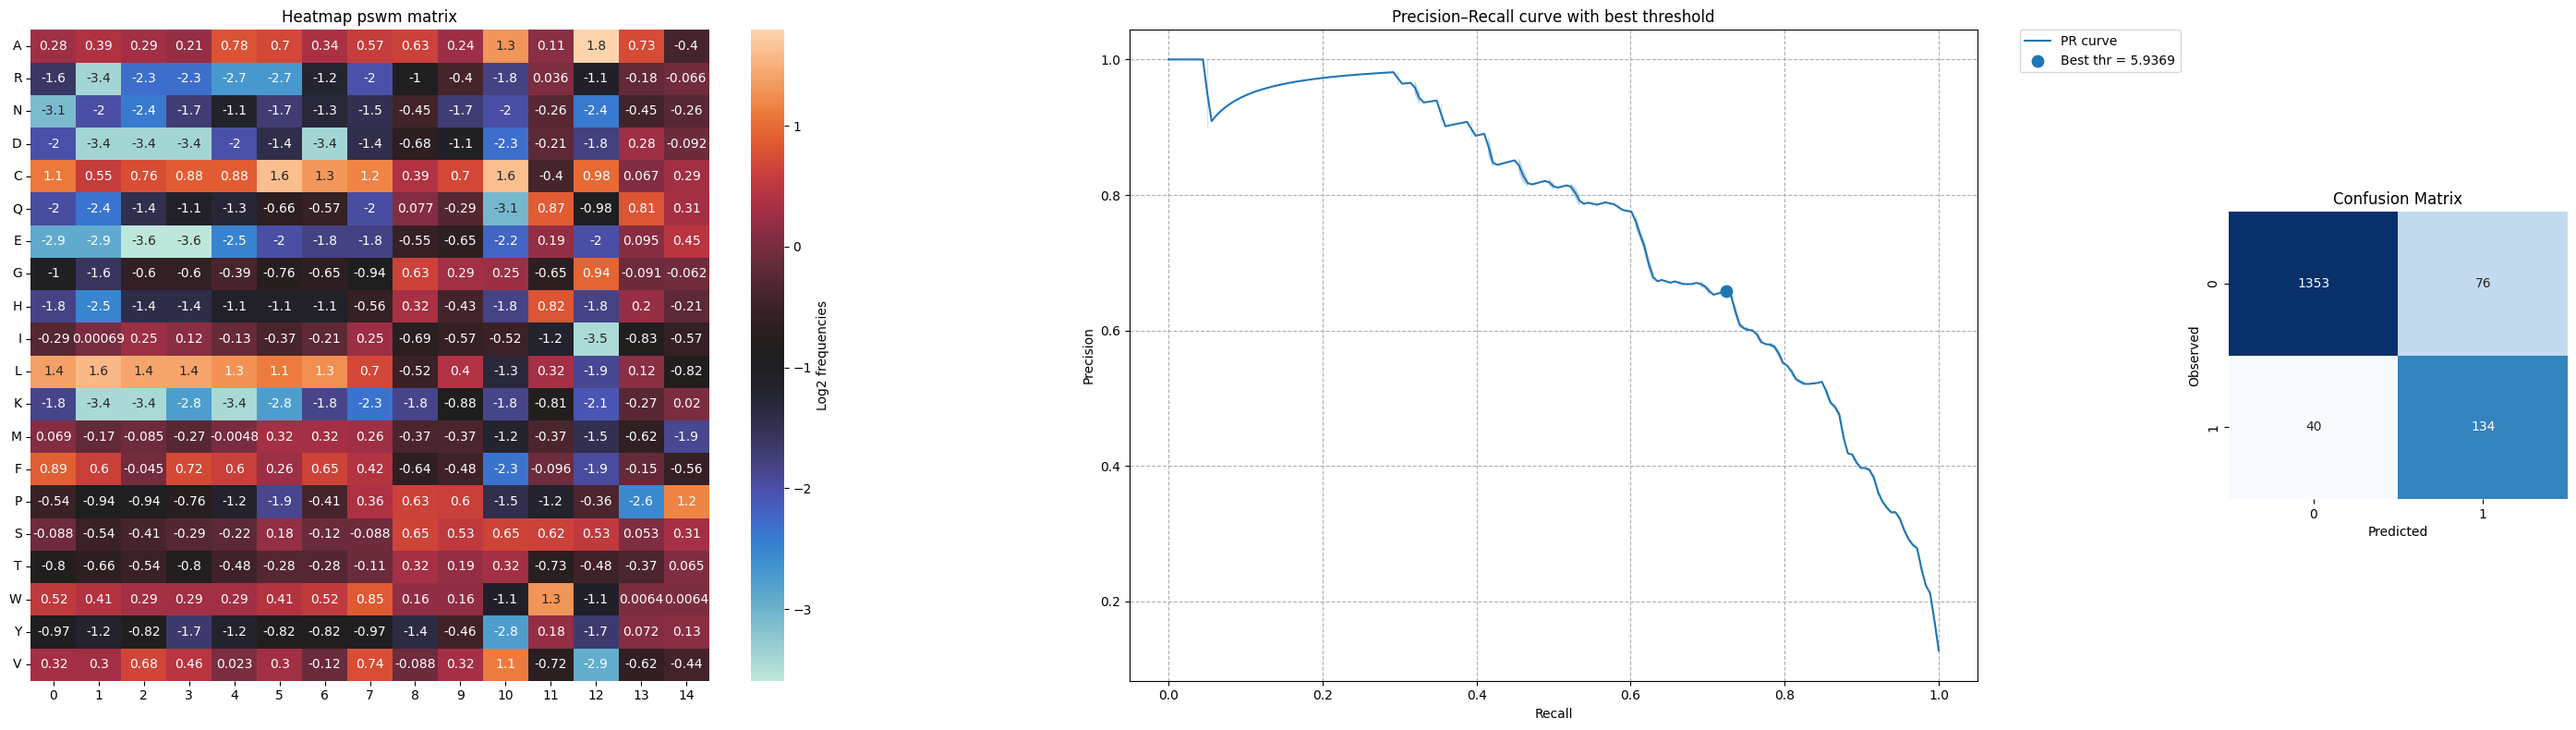

MCC = 0.6609716473424735
Precision = 0.9276356830941984
Accuracy = 0.638095238095238
Sensitivity = 0.7701149425287356
Confusion Matrix : 
          Positive  Negative
Positive      1353        76
Negative        40       134
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
testing set:  5
validation set:  1
training sets:  (2, 3, 4)


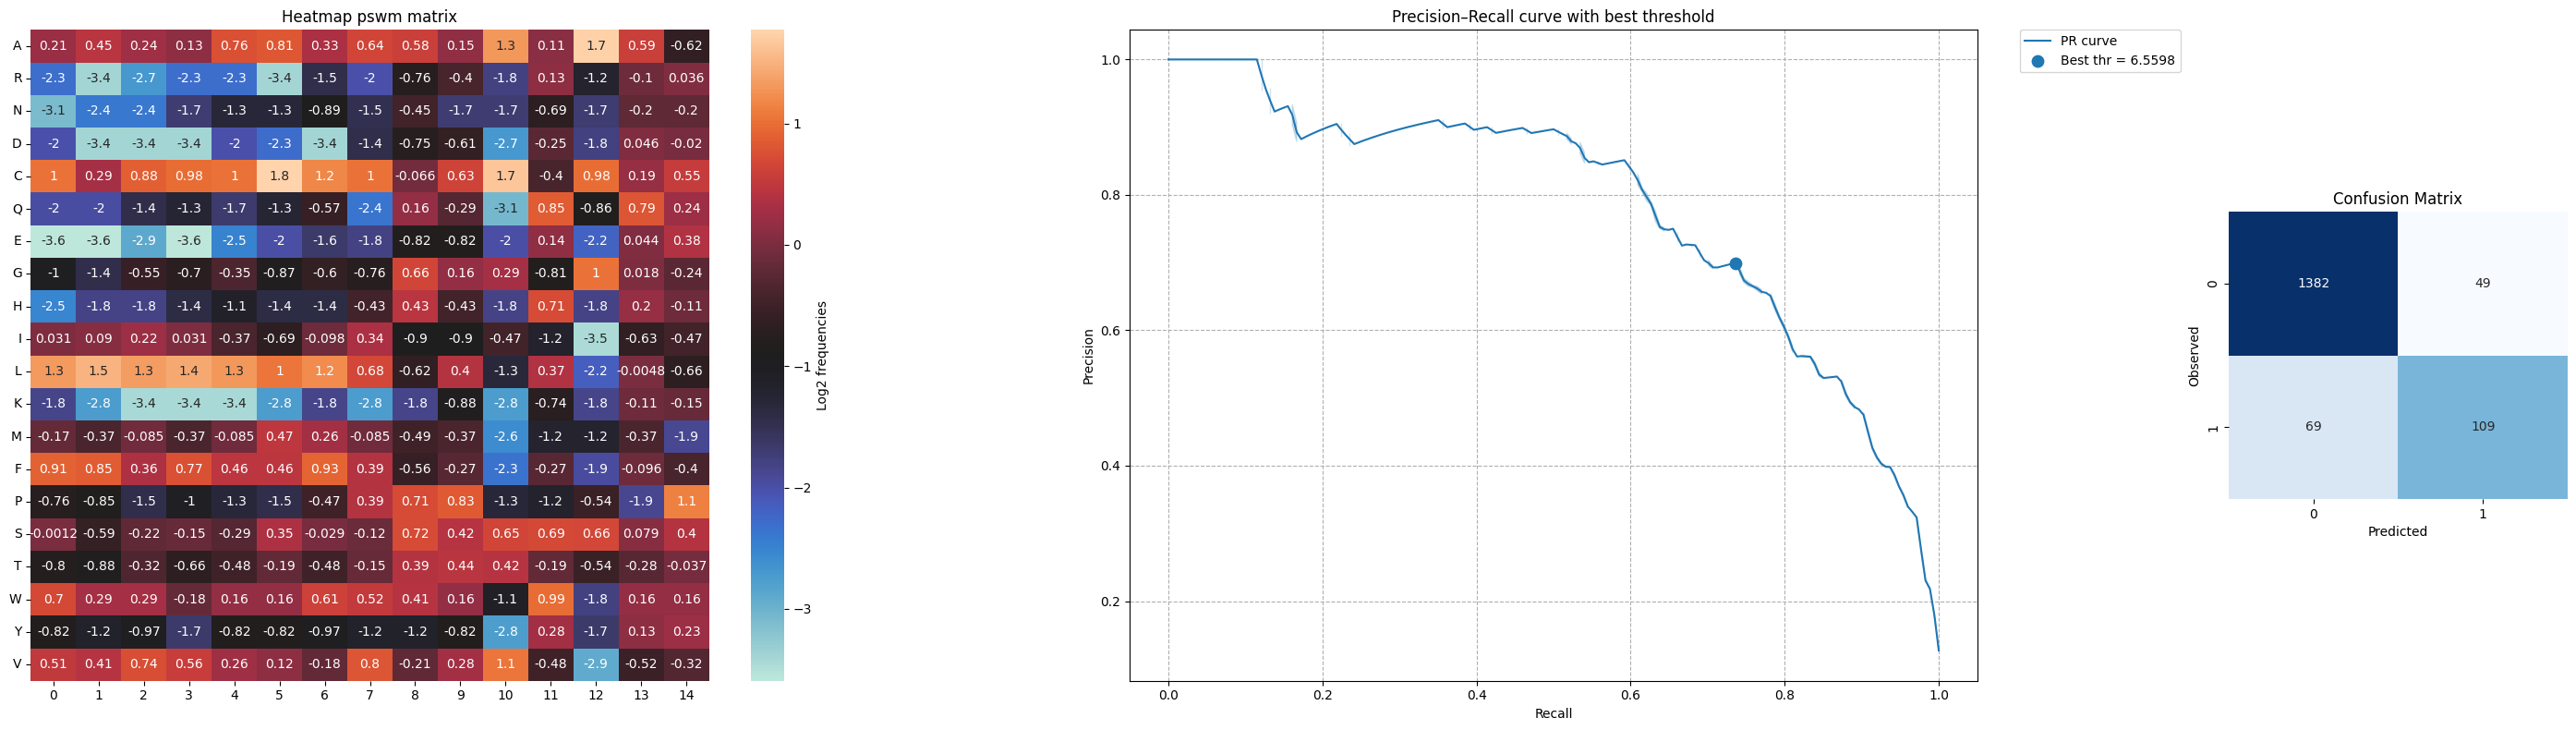

MCC = 0.6093739445234685
Precision = 0.9266625233064015
Accuracy = 0.689873417721519
Sensitivity = 0.6123595505617978
Confusion Matrix : 
          Positive  Negative
Positive      1382        49
Negative        69       109
----------------------------------------------------------------------------------------------------




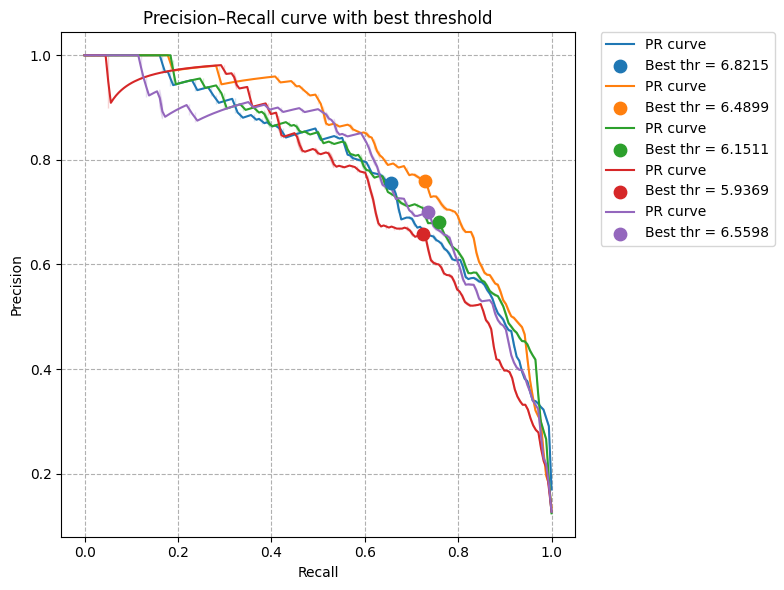

In [ ]:
total = pd.read_csv("../Data_Preparation/train_bench.tsv", sep = "\t")
stats_list=[]
metrics_name = ["MCC", "Precision", "Accuracy", "Sensitivity" , "Confusion Matrix"]
plt.ioff() 
fig_all, ax_all = plt.subplots(figsize=(8,6)) 
plt.close()
    
# 5-cross-validation run: for each run i, testing set=i, validation set=((i)%5)+1, training sets = remaining i sets
for i in range(1,6): 
    
    training_sets=((((i+1)%5)+1),(((i+2)%5)+1),(((i+3)%5)+1)) 
    testing = total.query(f"Set=='{i}'")
    validation = total.query(f"Set=='{((i)%5)+1}'")
    training = total.query(f"Class=='Positive' and (Set=='{training_sets[0]}' or Set=='{training_sets[1]}' or Set=='{training_sets[2]}')")

    print("-"*100)
    print("testing set: ",i)
    print("validation set: ", ((i)%5)+1)
    print("training sets: ",training_sets)



    # Compute the respective iteration PSWM
    pswm = get_pswm(training,13,2)

    # Get the metrics for the i-th run (MCC, Precision, Accuracy, Sensitivity)
    
    stats=metrics(pswm, validation, testing)
    stats_list.append(stats[:-1])


    for name, stat in zip(metrics_name,stats): 
        if name=="Confusion Matrix":
            confusion_df = pd.DataFrame(stat, columns=["Positive" , "Negative"], index=["Positive", "Negative"])
            print(f"{name} : \n{confusion_df}")
        else:    
            print(f"{name} = {stat}")
           
    fig_internal = stats[-1].get_figure()
    fig_internal.savefig(f"../Plots/pr_curve_and_heatmap_{i}.png" , bbox_inches="tight") 
    fig_internal.tight_layout()
    #display(fig)
    #plt.close(fig_internal)

    print("-"*100)
    print("\n")

    p = sns.lineplot(data=stats[-3], x="Recall", y="Precision", label="PR curve", ax=ax_all)

    # Best threshold point
    p.scatter(stats[-5][stats[-6] + 1], stats[-4][stats[-6] + 1],
            s=80, zorder=5, label=f"Best thr = {stats[-2]:.4f}")
    p.grid(True, linestyle = "--", alpha = 1)

    # Fix the legend outside the plot area
    p.legend(loc="upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0.)

    p.set_xlabel("Recall")
    p.set_ylabel("Precision")
    p.set_title("Precision–Recall curve with best threshold")

# setting the legend
ax_all.grid(True, linestyle="--", alpha=1)
ax_all.set_xlabel("Recall")
ax_all.set_ylabel("Precision")
ax_all.set_title("Precision–Recall curve with best threshold")
ax_all.legend(loc="upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# save plot all_pr_curves
fig_all.tight_layout()
fig_all.savefig("../Plots/all_pr_curves.png", dpi=300, bbox_inches="tight")
display(fig_all)


    

In [17]:
# remove confusion matrices from list of stats to average and put them in another list

stats_clean = [(y1, y2, y3, y4) for (y1, y2, y3, y4, y5, y6, y7, y8, y9, y10) in stats_list]   
conf_matrices = [y for (n1, n2, n3, n4, y, n6, n7, n8, n9, n10) in stats_list]  

#Convert the list of stats in an array to facilitate computations
stats_arr = np.array(stats_clean)

#Made the mean of each characteristic (MCC, Precision, Accuracy, Sensitivity)
stats_means = np.mean(stats_arr, axis=0)

#Compute the standard deviation 
stats_stds = stats_arr.std(axis=0, ddof=1)          

#Compute the SE
ses = stats_stds / np.sqrt(stats_arr.shape[0])       

#define the metrics
metrics = ["MCC", "Precision", "Accuracy", "Sensitivity"]

print('-'*11+'AVERAGED--METRICS'+'-'*11)
print("\n")

for name, mean, se in zip(metrics, stats_means, ses):
    print(f"{name} = {mean:.3f} ± {se:.3f}")
    
print("\n")
print('-'*40)



-----------AVERAGED--METRICS-----------


MCC = 0.663 ± 0.016
Precision = 0.934 ± 0.003
Accuracy = 0.691 ± 0.014
Sensitivity = 0.711 ± 0.029


----------------------------------------
